In [337]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization

In [338]:
# IMPORTING DATA
df = pd.read_csv('transactions.csv')

In [339]:
print(df.shape)
df.head()

(348676, 12)


,user_id,card_id,time,transaction_value,transaction_type,city,state,zip_code,MCC,data_quality,is_fraud,date
0,1,1,14:05,$488.00,Chip Transaction,Rome,Italy,NaN,3684,NaN,Yes,2019-5-11
1,1,1,14:53,$14.22,Chip Transaction,Rome,Italy,NaN,5311,NaN,Yes,2019-5-11
2,1,1,14:26,$13.79,Chip Transaction,Rome,Italy,NaN,4214,NaN,Yes,2019-5-16
3,1,1,15:12,$12.27,Chip Transaction,Rome,Italy,NaN,5812,NaN,Yes,2019-5-16
4,1,1,13:23,$38.63,Chip Transaction,Rome,Italy,NaN,5921,NaN,Yes,2019-5-17


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348676 entries, 0 to 348675
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            348676 non-null  int64  
 1   card_id            348676 non-null  int64  
 2   time               348676 non-null  object 
 3   transaction_value  348676 non-null  object 
 4   transaction_type   348676 non-null  object 
 5   city               348676 non-null  object 
 6   state              305422 non-null  object 
 7   zip_code           298909 non-null  float64
 8   MCC                348676 non-null  int64  
 9   data_quality       5576 non-null    object 
 10  is_fraud           348676 non-null  object 
 11  date               348676 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 31.9+ MB


In [341]:
#Exploratory Data Analysis (EDA)

cases = len(df)
nonfraud_count = len(df[df.is_fraud == 'No'])
fraud_count = len(df[df.is_fraud == 'Yes'])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT'))
print(cl('--------------------------------------------'))
print(cl('Total number of cases are {}'.format(cases)))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count)))
print(cl('Number of fraud cases are {}'.format(fraud_count)))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage)))
print(cl('--------------------------------------------'))

CASE COUNT
--------------------------------------------
Total number of cases are 348676
Number of Non-fraud cases are 344098
Number of fraud cases are 4578
Percentage of fraud cases is 1.33
--------------------------------------------


In [342]:
df['time'] = df['time'].str.replace(':', '.')
df['time'] = df['time'].map(lambda x: float(x))
Average_Fraud_Time=df.loc[df['is_fraud'] == 'Yes', 'time'].mean()
print(cl('Average Fraud Time {}'.format(Average_Fraud_Time)))
Fraud_Max_Time = df.loc[df['is_fraud'] == 'Yes', 'time'].max()
print(cl('Maximum Time of transaction in Fraud case is {}'.format(Fraud_Max_Time)))
Fraud_Min_Time = df.loc[df['is_fraud'] == 'Yes', 'time'].min()
print(cl('Minimum Time of transaction in Fraud case is {}'.format(Fraud_Min_Time)))


Average Fraud Time 14.73465487112276
Maximum Time of transaction in Fraud case is 19.59
Minimum Time of transaction in Fraud case is 4.04


In [343]:
print(cl('Average Non Fraud Time is {}'.format(Average_Non_Fraud_Time)))
print(cl('Average Fraud Time {}'.format(Average_Fraud_Time)))
Non_Fraud_Max_Time = df.loc[df['is_fraud'] == 'No', 'time'].max()
print(cl('Maximum Time of transaction in Non Fraud case is {}'.format(Non_Fraud_Max_Time)))
Non_Fraud_Min_Time = df.loc[df['is_fraud'] == 'No', 'time'].min()
print(cl('Minimum Time of transaction in Non Fraud case is {}'.format(Non_Fraud_Min_Time)))


Average Non Fraud Time is 12.703423501444354
Average Fraud Time 14.73465487112276
Maximum Time of transaction in Non Fraud case is 23.59
Minimum Time of transaction in Non Fraud case is 0.0


In [344]:
result = df.apply(lambda x: x.sort_values().unique()[0], axis=0)
print(result)

user_id                             0
card_id                             0
time                              0.0
transaction_value              $-0.20
transaction_type     Chip Transaction
city                        Abbeville
state                              AK
zip_code                       1012.0
MCC                              1711
data_quality                  Bad CVV
is_fraud                           No
date                         2018-1-1
dtype: object


In [345]:
fraud_count = len(df[df.is_fraud == 'Yes'])
print(cl('Number of fraud cases are {}'.format(fraud_count)))
df.loc[df['is_fraud'] == 'Yes', 'city'].value_counts()
#df['city'].value_counts()

Number of fraud cases are 4578


Rome          4427
ONLINE         128
Marion          22
Perrysburg       1
Name: city, dtype: int64

In [346]:
df.loc[df['is_fraud'] == 'No', 'city'].value_counts()

ONLINE         43126
Houston         3508
Los Angeles     2597
Miami           2416
Brooklyn        2126
               ...  
Tawas City         1
Prosperity         1
Bassett            1
Blue Ridge         1
Platte             1
Name: city, Length: 6708, dtype: int64

In [347]:
df.loc[df['is_fraud'] == 'Yes', 'transaction_type'].value_counts()

Chip Transaction      4008
Swipe Transaction      442
Online Transaction     128
Name: transaction_type, dtype: int64

In [348]:
df.loc[df['is_fraud'] == 'No', 'transaction_type'].value_counts()

Chip Transaction      242723
Swipe Transaction      58519
Online Transaction     42856
Name: transaction_type, dtype: int64

In [349]:
df['transaction_value'] = df['transaction_value'].str.replace('$', '')
df['transaction_value'] = df['transaction_value'].str.replace('-', '')
df['transaction_value'] = df['transaction_value'].map(lambda x: float(x))
df['transaction_value'].fillna((df['transaction_value'].mean()), inplace=True)
Total_Fraud_transaction_value=df.loc[df['is_fraud'] == 'Yes', 'transaction_value'].sum()
print(cl('Total Fraud Transaction Amount {}'.format(Total_Fraud_transaction_value)))
#fraud_count = len(df[df.is_fraud == 'Yes'])
#Average_Transaction = round(Total_Fraud_transaction_value/fraud_count*100, 2)
Average_Transaction=df.loc[df['is_fraud'] == 'Yes', 'transaction_value'].mean()
print(cl('Average Transaction Amount per Fraud user {}'.format(Average_Transaction)))
Highest_Fraud_transaction_value=df.loc[df['is_fraud'] == 'Yes', 'transaction_value'].max()
print(cl('Highest Fraud Transaction Amount {}'.format(Highest_Fraud_transaction_value)))
Average_Transaction_Non_Fraud=df.loc[df['is_fraud'] == 'No', 'transaction_value'].mean()
print(cl('Average Transaction Amount per Non Fraud user {}'.format(Average_Transaction_Non_Fraud)))
Max_Non_Fraud_transaction_value=df.loc[df['is_fraud'] == 'N0', 'transaction_value'].max()
print(cl('Highest Non Fraud Transaction Amount {}'.format(Highest_Non_Fraud_transaction_value)))

/tmp/ipykernel_10024/1181264445.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['transaction_value'] = df['transaction_value'].str.replace('$', '')


Total Fraud Transaction Amount 412520.31
Average Transaction Amount per Fraud user 90.10928571428572
Highest Fraud Transaction Amount 1442.63
Average Transaction Amount per Non Fraud user 52.512355346442014
Highest Non Fraud Transaction Amount 6613.44


Text(0.5, 1.0, 'Transaction times')

<Figure size 960x320 with 0 Axes>

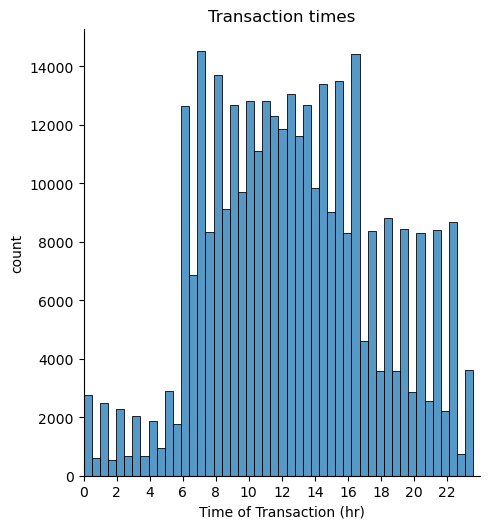

In [350]:
import seaborn as sns

plt.figure(figsize=(12,4), dpi=80)
amount_value = df['transaction_value'].values # values
time_value = df['time'].values # values
sns.displot(time_value, bins=48)
plt.xlim([0,24])
plt.xticks(np.arange(0,24,2))
plt.xlabel('Time of Transaction (hr)')
plt.ylabel('count')
plt.title('Transaction times')

Text(0.5, 1.0, 'Transaction times')

<Figure size 960x320 with 0 Axes>

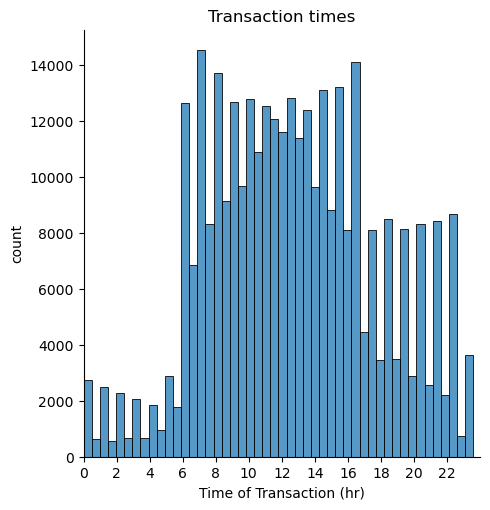

In [351]:
df_nofraud=df[df.is_fraud == 'No']
#df_nofraud_value=df_nofraud.values
plt.figure(figsize=(12,4), dpi=80)
#amount_value = df['transaction_value'].values # values
time_value = df['time'].values # values
sns.displot(df_nofraud['time'], bins=48)
plt.xlim([0,24])
plt.xticks(np.arange(0,24,2))
plt.xlabel('Time of Transaction (hr)')
plt.ylabel('count')
plt.title('Transaction times')

Text(0.5, 1.0, 'Transaction times')

<Figure size 960x320 with 0 Axes>

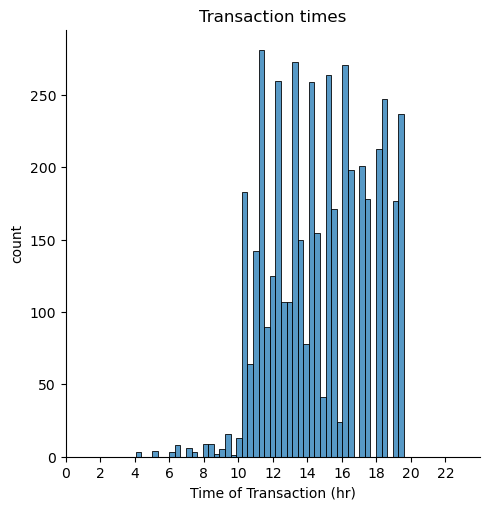

In [352]:
df_fraud=df[df.is_fraud == 'Yes']
#df_nofraud_value=df_nofraud.values
plt.figure(figsize=(12,4), dpi=80)
#amount_value = df['transaction_value'].values # values
time_value = df['time'].values # values
sns.displot(df_fraud['time'], bins=48)
plt.xlim([0,24])
plt.xticks(np.arange(0,24,2))
plt.xlabel('Time of Transaction (hr)')
plt.ylabel('count')
plt.title('Transaction times')